In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
train_type = "easy"

train_steps_all = [2000, 4000, 6000, 8000, 10000, 15000, 20000]

accs_all_easy = []

for train_steps in train_steps_all:
    acc = (np.load(f"../ckpts/gsm8k_aug_fft_{train_type}{train_steps}/test_answer_types5_seed0.npy")==0).mean(axis=-1)
    accs_all_easy.append(acc)
accs_all_easy = np.array(accs_all_easy)

In [3]:
train_type = "hard"

train_steps_all = [2000, 4000, 6000, 8000, 10000]

accs_all_hard = []

for train_steps in train_steps_all:
    acc = (np.load(f"../ckpts/gsm8k_aug_fft_{train_type}{train_steps}/test_answer_types5_seed0.npy")==0).mean(axis=-1)
    accs_all_hard.append(acc)
accs_all_hard = np.array(accs_all_hard)

In [4]:
train_type = "mixed"

train_steps_all =  [2000, 4000, 6000, 8000, 10000, 15000, 20000]

accs_all_mixed = []

for train_steps in train_steps_all:
    acc = (np.load(f"../ckpts/gsm8k_aug_fft_{train_type}{train_steps}/test_answer_types5_seed0.npy")==0).mean(axis=-1)
    accs_all_mixed.append(acc)
accs_all_mixed = np.array(accs_all_mixed)

In [7]:
from datasets import load_dataset

dataset = load_dataset("gsm8k", "main")

test_questions = dataset["test"]["question"]
test_answers = dataset["test"]['answer']

num_newlines = [len(q.split("\n")) for q in test_answers]

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
for i in range(3, 9):
    idxs = np.where(num_newlines ==i)[0]
    print(accs_all_mixed[-3][idxs].mean())

0.7042944785276073
0.6162162162162163
0.5234899328859061
0.4620689655172414
0.2818181818181818
0.26


In [40]:
num_newlines = np.array(num_newlines)
easy_test_idxs = np.where(num_newlines <=3)[0]
hard_test_idxs = np.where(num_newlines >=6)[0]

In [41]:
# print(accs_all_mixed[-3][easy_test_idxs].mean())
# print(accs_all_easy[-3][easy_test_idxs].mean())

print(accs_all_mixed[4][hard_test_idxs].mean())
print(accs_all_mixed2[-1][hard_test_idxs].mean())
print(accs_all_easy[4][hard_test_idxs].mean())
print(accs_all_hard[4][hard_test_idxs].mean())


0.3698461538461539
0.38707692307692304
0.31446153846153846
0.3169230769230769


(array([326., 370., 298., 174.,  88.,  40.,  20.,   2.,   0.,   1.]),
 array([ 3. ,  3.9,  4.8,  5.7,  6.6,  7.5,  8.4,  9.3, 10.2, 11.1, 12. ]),
 <BarContainer object of 10 artists>)

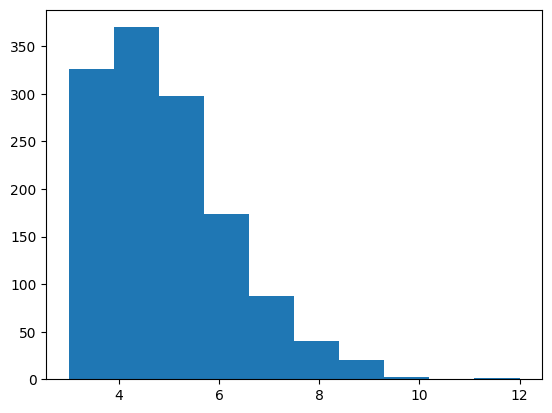

In [11]:
plt.hist(num_newlines)

array([1., 1., 0., ..., 1., 0., 1.])

In [36]:
train_type = "medium"

train_steps_all =  [2000, 4000, 6000, 8000, 10000, 15000, 20000]

accs_all_medium = []

for train_steps in train_steps_all:
    acc = (np.load(f"../ckpts/gsm8k_aug_fft_{train_type}{train_steps}/test_answer_types5_seed0.npy")==0).mean(axis=-1)
    accs_all_medium.append(acc)
accs_all_medium = np.array(accs_all_medium)

In [34]:
train_type = "easy_two"

train_steps_all = [2000, 4000, 6000]

accs_all_easy2 = []

for train_steps in train_steps_all:
    acc = (np.load(f"../ckpts/gsm8k_aug_fft_{train_type}{train_steps}/test_answer_types5_seed0.npy")==0).mean(axis=-1)
    accs_all_easy2.append(acc)
accs_all_easy2 = np.array(accs_all_easy2)

In [29]:
accs_all_mixed[0].mean()

0.37437452615617894

In [35]:
train_type = "easy_three"

train_steps_all = [1000, 2000, 3000, 10000]

accs_all_easy3 = []

for train_steps in train_steps_all:
    acc = (np.load(f"../ckpts/gsm8k_aug_fft_{train_type}{train_steps}/test_answer_types5_seed0.npy")==0).mean(axis=-1)
    accs_all_easy3.append(acc)
accs_all_easy3 = np.array(accs_all_easy3)

# acc = (np.load(f"../ckpts/gsm8k_aug_fft_easy_three2000/test_answer_types5_seed0.npy")==0).mean(axis=-1)
# print(acc.mean())

In [36]:
train_type = "mixed_two"

train_steps_all = [1000, 2000, 3000, 10000]

accs_all_mixed2 = []

for train_steps in train_steps_all:
    acc = (np.load(f"../ckpts/gsm8k_aug_fft_{train_type}{train_steps}/test_answer_types5_seed0.npy")==0).mean(axis=-1)
    accs_all_mixed2.append(acc)
accs_all_mixed2 = np.array(accs_all_mixed2)

In [28]:
acc = (np.load(f"../ckpts/gsm8k_aug_fft_mixed_two2000/test_answer_types5_seed0.npy")==0).mean(axis=-1)
print(acc.mean())

0.36770280515542075


In [8]:
accs_all_easy.shape

(4, 1319)

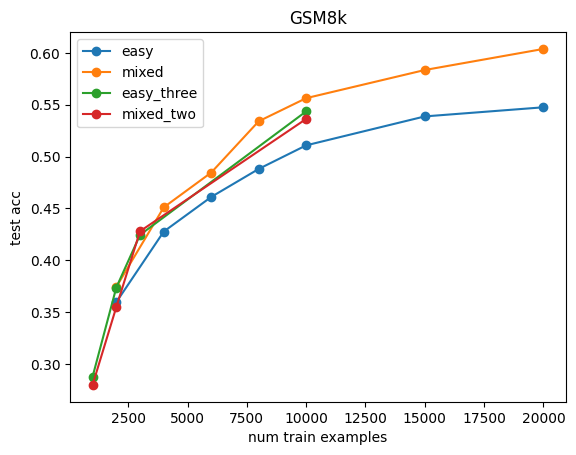

In [47]:
# train_steps_all = [2000, 4000, 6000, 8000, 10000, 15000, 20000]
plt.plot(train_steps_all, accs_all_easy.mean(axis=-1), "o-", label="easy")
# plt.plot([2000, 4000, 6000, 8000, 10000], accs_all_hard.mean(axis=-1), "o-",  label="hard")
plt.plot(train_steps_all, accs_all_mixed.mean(axis=-1), "o-",  label="mixed")

plt.plot( [1000, 2000, 3000, 10000], accs_all_easy3.mean(axis=-1), "o-",  label="easy_three")
plt.plot( [1000, 2000, 3000, 10000], accs_all_mixed2.mean(axis=-1), "o-",  label="mixed_two")
# plt.plot(train_steps_all, accs_all_medium.mean(axis=-1), "o-",  label="medium")
# plt.plot([2000, 4000, 6000], accs_all_easy2.mean(axis=-1), "o-",  label="easy_two")

plt.xlabel("num train examples")
plt.ylabel("test acc")

plt.title("GSM8k")
plt.legend()

In [8]:
num_correct1 = []
num_correct2 = []

for seed in range(4):
    num_correct1.append((np.load(f"../GSM8K_AUG/train_part1_answer_types5_seed{seed}.npy")==0).sum(axis=-1))
    num_correct2.append((np.load(f"../GSM8K_AUG/train_part2_answer_types5_seed{seed}.npy")==0).sum(axis=-1))

    
num_correct1 = np.sum(num_correct1, axis=0)
num_correct2 = np.sum(num_correct2, axis=0)
num_correct = np.concatenate([num_correct1, num_correct2])

(array([11844.,  5569.,  4554.,  3901.,  3629.,  3559.,  3461.,  3410.,
         3465.,  3477.,  3621.,  3683.,  3814.,  4150.,  4218.,  4677.,
         5177.,  6143.,  7727., 11030.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <BarContainer object of 20 artists>)

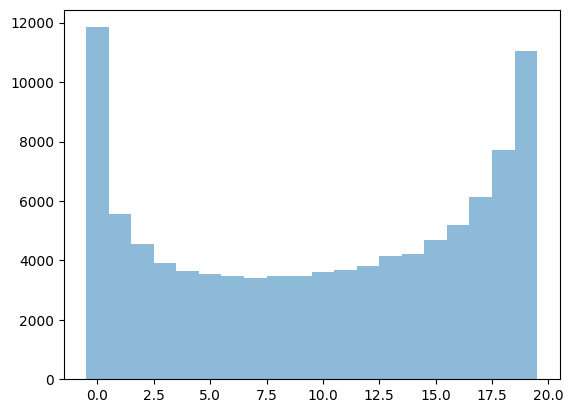

In [22]:
plt.hist(num_correct, bins=np.array(range(0, 21))-0.5, alpha=0.5, label="train")

In [24]:
(num_correct<=2).mean()

0.13964768631240346

In [13]:
(num_correct>=10).mean()

0.7020463691092986

In [19]:
pretrain_test_accs = (np.load("../GSM8K_AUG/base_model_few_shot_test_answer_types100.npy")==0).sum(axis=-1)

In [37]:
accs_all_easy.shape

(4, 1319)

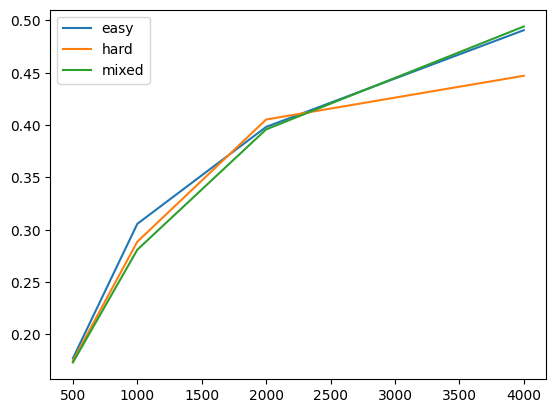

In [65]:
hard_idxs = np.where((pretrain_test_accs<50)*(pretrain_test_accs>0))[0]
plt.plot(train_steps_all, accs_all_easy[:, hard_idxs].mean(axis=-1), label="easy")
plt.plot(train_steps_all, accs_all_hard[:, hard_idxs].mean(axis=-1), label = "hard")
plt.plot(train_steps_all, accs_all_mixed[:, hard_idxs].mean(axis=-1), label = "mixed")

plt.legend()

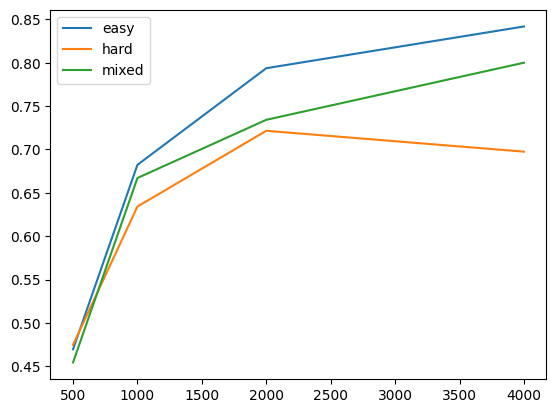

In [54]:
easy_idxs = np.where(pretrain_test_accs>=30)[0]

plt.plot(train_steps_all, accs_all_easy[:, easy_idxs].mean(axis=-1), label="easy")
plt.plot(train_steps_all, accs_all_hard[:, easy_idxs].mean(axis=-1), label = "hard")
plt.plot(train_steps_all, accs_all_mixed[:, easy_idxs].mean(axis=-1), label = "mixed")

plt.legend()